In [1]:
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
print (torch.__version__)

0.3.0.post4


In [4]:
x = torch.Tensor(5,3)
print (x)


 9.8921e+14  4.5661e-41  3.5924e-37
 0.0000e+00 -8.9860e+27  4.5660e-41
-8.9860e+27  4.5660e-41 -8.9860e+27
 4.5660e-41 -8.9860e+27  4.5660e-41
-8.9860e+27  4.5660e-41 -8.9860e+27
[torch.FloatTensor of size 5x3]



In [6]:
x = torch.rand(5,3)
print(x)


 0.9424  0.7055  0.5237
 0.6521  0.0360  0.2874
 0.6038  0.4836  0.4063
 0.8842  0.2197  0.3315
 0.7672  0.6036  0.7634
[torch.FloatTensor of size 5x3]



In [7]:
y = torch.rand(5,3)
print (x + y)


 1.6601  1.3889  1.5161
 1.1697  0.8405  0.9892
 0.8581  0.5533  1.3062
 1.1893  0.9333  0.8065
 1.6181  1.2380  1.2587
[torch.FloatTensor of size 5x3]



In [10]:
result = torch.Tensor(5,3)
torch.add(x, y, out=result)
print(result)


 1.6601  1.3889  1.5161
 1.1697  0.8405  0.9892
 0.8581  0.5533  1.3062
 1.1893  0.9333  0.8065
 1.6181  1.2380  1.2587
[torch.FloatTensor of size 5x3]



In [13]:
y.add(x)
print(y)
y.add_(x)
print(y)


 1.6601  1.3889  1.5161
 1.1697  0.8405  0.9892
 0.8581  0.5533  1.3062
 1.1893  0.9333  0.8065
 1.6181  1.2380  1.2587
[torch.FloatTensor of size 5x3]


 2.6025  2.0943  2.0398
 1.8218  0.8765  1.2767
 1.4619  1.0370  1.7125
 2.0736  1.1530  1.1381
 2.3853  1.8416  2.0221
[torch.FloatTensor of size 5x3]



In [23]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [15]:
a = torch.ones(5)
print (a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [16]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [17]:
a.add_(1)
print (a)
print (b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [19]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [27]:
x = torch.randn(4, 4)
y = torch.randn(4, 4)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)


 2.3342 -1.2142  2.8079 -1.0747
-1.8327  0.9247 -2.1862  0.0620
-1.8493  1.3624  2.1065  2.1075
 1.5292 -1.8724 -0.4891 -2.7013
[torch.cuda.FloatTensor of size 4x4 (GPU 0)]



In [29]:
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [30]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [31]:
print(y.grad_fn)

In [32]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [33]:
out.backward()
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [34]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print (y)

Variable containing:
 1258.1829
   46.1656
 1284.8384
[torch.FloatTensor of size 3]



In [35]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  204.8000
 2048.0000
    0.2048
[torch.FloatTensor of size 3]



In [50]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [51]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [52]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [53]:
input = Variable(torch.randn(1,1,32,32))
out = net(input)
print(out)

Variable containing:
 0.1034  0.0592  0.0020 -0.0600 -0.0489 -0.0529  0.0432  0.1187  0.0853 -0.1223
[torch.FloatTensor of size 1x10]



In [55]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [56]:
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.4615
[torch.FloatTensor of size 1]



In [65]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [66]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
-0.0044
 0.0105
-0.1562
 0.0570
-0.0205
 0.0404
[torch.FloatTensor of size 6]



In [67]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [73]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()

#print(list(net.parameters())[0])

optimizer.step()

#print(list(net.parameters())[0])

Parameter containing:
(0 ,0 ,.,.) = 
  0.0483  0.0202 -0.1873 -0.1051 -0.1278
 -0.0344  0.1058 -0.1835  0.1471  0.1045
  0.1301  0.1273 -0.1299 -0.0022 -0.1612
 -0.2063  0.1508  0.0105  0.0344 -0.2100
  0.0564  0.1162  0.1770  0.0703  0.1181

(1 ,0 ,.,.) = 
  0.2009 -0.1148 -0.1068 -0.1856  0.1337
 -0.0696 -0.0602 -0.1641  0.1835  0.1201
 -0.0352 -0.0927  0.0738  0.1580  0.1241
 -0.2035 -0.1868 -0.2033  0.0984  0.1380
 -0.1596  0.1504 -0.1789  0.1442 -0.0050

(2 ,0 ,.,.) = 
  0.0848 -0.0344  0.0895 -0.1685  0.1194
 -0.1603  0.0368  0.0876  0.1863 -0.1001
  0.0600  0.0322  0.0822 -0.0540  0.0126
 -0.1277 -0.0107 -0.0556  0.0232 -0.0129
  0.2041 -0.0736  0.0751  0.1755  0.0180

(3 ,0 ,.,.) = 
 -0.0339  0.0037  0.1700  0.1470 -0.1530
 -0.0453  0.0091  0.1416 -0.0856 -0.0834
  0.1527  0.1615 -0.1332 -0.0576 -0.1321
  0.0369  0.1922  0.1685 -0.0391  0.1220
  0.0147  0.1294  0.0839 -0.1848 -0.0066

(4 ,0 ,.,.) = 
  0.1003  0.0353 -0.1482  0.0823  0.1901
  0.1989 -0.1149 -0.0590  0.0758  0.11

In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                       transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, 
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                                      transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False,
                                         num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainset

  dog   cat   dog horse


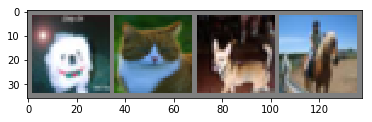

In [112]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [152]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [153]:
net = Net()
net.cuda()

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)

In [154]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [156]:
for epoch in range(2):
    running_loss = 0.
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss = loss.data[0]
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.

print('Finished Training')

[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.002
[2,  2000] loss: 0.001
[2,  4000] loss: 0.001
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.000
Finished Training


In [1]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

NameError: name 'testloader' is not defined

In [158]:
outputs = net(Variable(images.cuda()))
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car  ship plane


In [162]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of the network on 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on 10000 test images: 53 %


In [163]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda())
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i]/class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 73 %
Accuracy of  bird : 37 %
Accuracy of   cat : 27 %
Accuracy of  deer : 54 %
Accuracy of   dog : 48 %
Accuracy of  frog : 56 %
Accuracy of horse : 60 %
Accuracy of  ship : 77 %
Accuracy of truck : 40 %


In [165]:
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [166]:
class RandomDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
        
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len
    
rand_loader = DataLoader(dataset=RandomDataset(input_size, 100), batch_size=batch_size, 
                         shuffle=True)

In [167]:
class Model(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, input):
        output = self.fc(input)
        print(' In  Model: input size', input.size(), 'output size', output.size())
    
        return output

In [170]:
model = Model(input_size, output_size)
print("Let's use", torch.cuda.device_count(), "GPUs!")
model = nn.DataParallel(model)
model.cuda()

Let's use 1 GPUs!


DataParallel(
  (module): Model(
    (fc): Linear(in_features=5, out_features=2)
  )
)

In [171]:
for data in rand_loader:
    if torch.cuda.is_available():
        input_var = Variable(data.cuda())
    else:
        input_var = Variable(data)
        
    output = model(input_var)
    print("Outside: input size", input_var.size(), "output_size", output.size())

 In  Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
 In  Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
 In  Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
 In  Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
